In [1]:
import pandas as pd
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt

# Load the Howard Springs data
The code in the cell bellow opens the flux and met data and loads each into seperate Xarrays.

In [2]:
# Floder containing flux and met files
data_folder = "/Users/jb14389/Desktop/Flux_data/OZFlux2.0/OzFlux/"

# Site name
site_name = "HowardSprings"

# Create file names for site flux and met
site_flux_file = site_name + "OzFlux2.0_flux.nc"
site_met_file  = site_name + "OzFlux2.0_met.nc"

# Laod flux and met data into xarrays
ds_flux = xr.open_dataset(data_folder + site_flux_file, decode_times=False)
ds_met = xr.open_dataset(data_folder + site_met_file, decode_times=False)

# Setup dates index
Sometimes flux data does not have the correct time indexed. The code below identifies the time_jump between entries and creates a new date index for the two data sets.

In [3]:
# Identify time jump
time_jump = int(ds_flux.time[1].values) - int(ds_flux.time[0].values)

# Identify the frequency in time of each entry
if time_jump == 3600:
    freq = "1h"
elif time_jump == 1800:
    freq = "0.5h"
elif time_jump == 10800:
    freq = "3h"
else:
    raise("Time problem")

# calculate start date
units, reference_date = ds_flux.time.attrs['units'].split('since')
start = reference_date.strip().split(" ")[0].replace("-","/")

# create dates index
ds_flux['dates'] = pd.date_range(start=start, periods=len(ds_flux.GPP), freq=freq)
ds_met['dates'] = pd.date_range(start=start, periods=len(ds_flux.GPP), freq=freq)

# Drop unused dimentions
One of the benefits of a netCDF file is it's ability to handle multiple dimenions. In this use case however there is no spacial component only time, i.e. there is only one fisical location with values measured in time. The code bellow drops these unwanted dimentions to make indexing latter easier.

In [4]:
# drop xyz dims
ds_flux = ds_flux.squeeze(dim = ["x","y"], drop = True)
ds_met = ds_met.squeeze(dim = ["x","y","z"], drop = True)

# Data structure
When working with Xarrays in jupyter notebook you can output a description of the structure by simmply placing the xarray variable as the last entry in a code cell. The two cells bellow do this for the flux and met data.

In [5]:
ds_flux

<xarray.Dataset> Size: 18MB
Dimensions:           (time: 227904, dates: 227904)
Coordinates:
  * time              (time) float64 2MB 0.0 1.8e+03 ... 4.102e+08 4.102e+08
  * dates             (dates) datetime64[ns] 2MB 2002-01-01 ... 2014-12-31T23...
Data variables: (12/24)
    latitude          float32 4B ...
    longitude         float32 4B ...
    Qle               (time) float32 912kB ...
    Qh                (time) float32 912kB ...
    NEE               (time) float32 912kB ...
    GPP               (time) float32 912kB ...
    ...                ...
    elevation         float32 4B ...
    reference_height  float32 4B ...
    canopy_height     float32 4B ...
    utc_offset        float32 4B ...
    averagePrecip     float32 4B ...
    averageTemp       float32 4B ...
Attributes: (12/17)
    Production_time:                  2016-03-08 16:44:40
    Production_source:                PALS netcdf conversion
    PALS_fluxtower_template_version:  1.0.2
    site_name:                        HowardSprings
    site_dataset_version:             2.0
    IGBP_vegetation_type:             Savanna
    ...                               ...
    OzFlux_soil_description:          red kandasol
    time_zone:                        Australia/Darwin
    OzFlux_processing_datetime:       2015-12-30 04:17:25
    Licence_type:                     TERN-BY-SA-NC
    Licence_URL:                      http://www.tern.org.au/datalicence/TERN...
    Acknowledgement:                  This work used eddy covariance data col...

In [6]:
ds_met

<xarray.Dataset> Size: 26MB
Dimensions:           (time: 227904, dates: 227904)
Coordinates:
  * time              (time) float64 2MB 0.0 1.8e+03 ... 4.102e+08 4.102e+08
  * dates             (dates) datetime64[ns] 2MB 2002-01-01 ... 2014-12-31T23...
Data variables: (12/24)
    latitude          float32 4B ...
    longitude         float32 4B ...
    SWdown            (time) float32 912kB ...
    Tair              (time) float32 912kB ...
    Rainf             (time) float32 912kB ...
    Qair              (time) float32 912kB ...
    ...                ...
    elevation         float32 4B ...
    reference_height  float32 4B ...
    canopy_height     float32 4B ...
    utc_offset        float32 4B ...
    averagePrecip     float32 4B ...
    averageTemp       float32 4B ...
Attributes: (12/17)
    Production_time:                  2016-03-08 16:44:32
    Production_source:                PALS netcdf conversion
    PALS_fluxtower_template_version:  1.0.2
    site_name:                        HowardSprings
    PALS_dataset_version:             2.0
    IGBP_vegetation_type:             Savanna
    ...                               ...
    OzFlux_soil_description:          red kandasol
    time_zone:                        Australia/Darwin
    OzFlux_processing_datetime:       2015-12-30 04:17:25
    Licence_type:                     TERN-BY-SA-NC
    Licence_URL:                      http://www.tern.org.au/datalicence/TERN...
    Acknowledgement:                  This work used eddy covariance data col...

# Plotting the data
Now we have loaded some of the data lets plot the data just to check everything is as expected.

## Plotting GPP
How does the GPP vary over time?

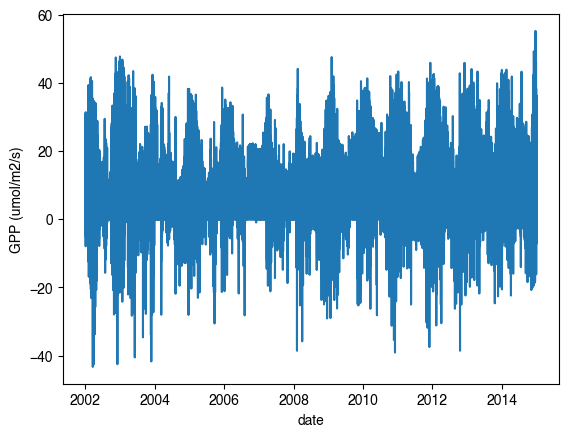

In [7]:
# Plot the GPP as a function of dates
plt.plot(ds_flux['dates'], ds_flux['GPP'])

# Format plot
plt.xlabel("date")
plt.ylabel("GPP (umol/m2/s)")
plt.show()

What is the distribution of GPP values?

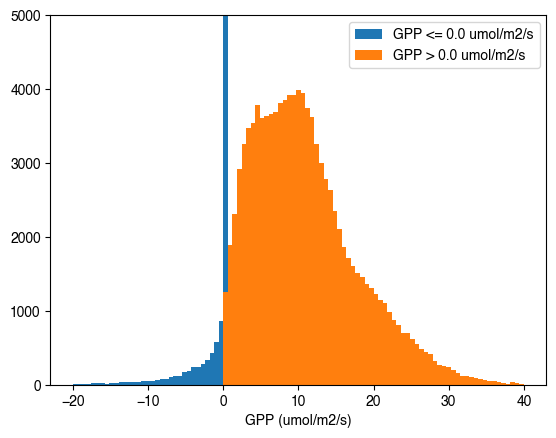

In [8]:
bins = np.linspace(-20,40,100)

# Plot data
plt.hist(ds_flux.where((ds_flux.GPP <= 0.0))['GPP'], bins = bins, label = 'GPP <= 0.0 umol/m2/s')
plt.hist(ds_flux.where((ds_flux.GPP > 0.0))['GPP'], bins = bins, label = 'GPP > 0.0 umol/m2/s')

# Format plot
plt.xlabel("GPP (umol/m2/s)")
plt.ylim(0,5000)
plt.legend()
plt.show()

Why is there a large number of times when the GPP is zero? How should we handel these and the negative GPP values?

# Plotting VPD
Before we can plot VPD we need to calculate it using the function below.

In [9]:
def qair_to_vpd(qair, tair, press):

    """
    Qair : float
        specific humidity [kg kg-1]
    tair : float
        air temperature [deg K]
    press : float
        air pressure [Pa]
    """

    PA_TO_KPA = 0.001
    HPA_TO_PA = 100.0

    tc = tair - 273.15

    # saturation vapor pressure (Pa)
    es = HPA_TO_PA * 6.112 * np.exp((17.67 * tc) / (243.5 + tc))

    # vapor pressure
    ea = (qair * press) / (0.622 + (1.0 - 0.622) * qair)

    vpd = (es - ea) * PA_TO_KPA

    vpd = np.where(vpd < 0.05, 0.05, vpd)

    return vpd


In [10]:
ds_met["VPD"] = qair_to_vpd(ds_met.Qair, ds_met.Tair, ds_met.PSurf)

What is the distribution of VPD values?

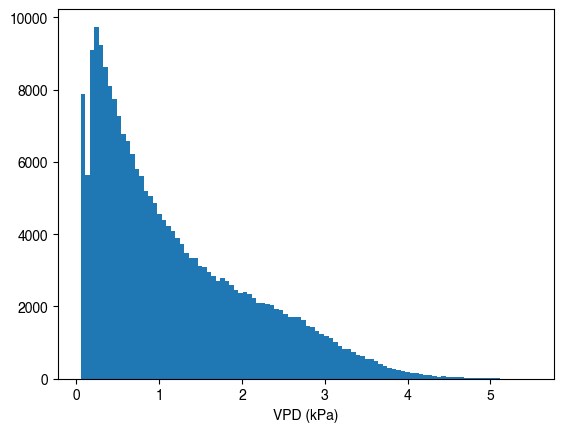

In [11]:
plt.hist(ds_met.VPD, bins=100)
plt.xlabel("VPD (kPa)")

plt.show()

How does the VPD vary as a function of date?

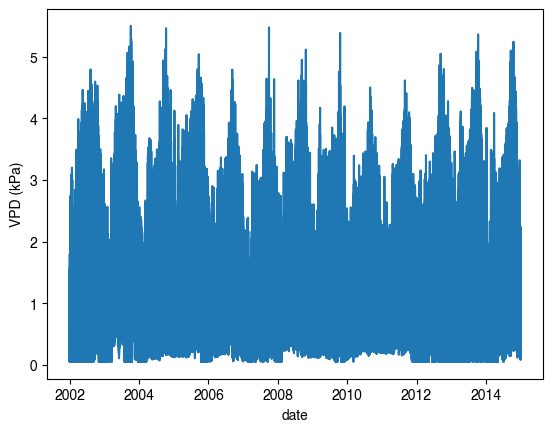

In [12]:
plt.plot(ds_met['dates'][:], ds_met.VPD)

# Format plot
plt.xlabel("date")
plt.ylabel("VPD (kPa)")
plt.show()